In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 

In [ ]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [ ]:
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset
train_images, train_labels = read_hoda_dataset('./HodaDatasetReader/DigitDB/Train 60000.cdb',images_height=32, images_width=32, one_hot=True, reshape=False)
test_images, test_labels = read_hoda_dataset('./HodaDatasetReader/DigitDB/Test 20000.cdb' ,images_height=32, images_width=32, one_hot=True, reshape=False)


<ipython-input-4-5db87576d8f8>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  figure.add_subplot(3, 3, i)


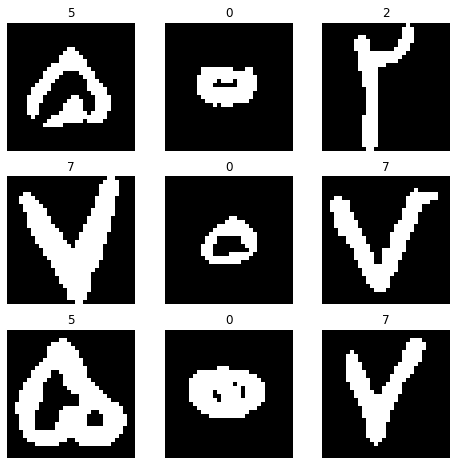

In [ ]:
figure = plt.figure(figsize=(8, 8))
figure.add_subplot(3, 3, 1)
for i in range(1, 10):
    sample_img , sample_lbl = train_images[i], np.argmax(train_labels[i])
    figure.add_subplot(3, 3, i)
    plt.title(sample_lbl)
    plt.axis("off")
    plt.imshow(sample_img[:,:,0],  cmap="gray")
plt.show()

# Build the model

In [ ]:
import tensorflow as tf
from keras import layers

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    #define your network layers here
    self.conv2D_1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1))
    self.conv2D_2 = layers.Conv2D(64, (3, 3), activation='relu')
    self.conv2D_3 = layers.Conv2D(64, (3, 3), activation='relu')
    self.maxPool_1 = layers.MaxPooling2D((2, 2))
    self.maxPool_2 = layers.MaxPooling2D((2, 2))
    self.flatten = layers.Flatten()
    self.dense = layers.Dense(64, activation='relu')
    self.dropOut = layers.Dropout(0.5)
    self.outputs = layers.Dense(10, activation='softmax')

  def call(self, inputs, training=False):
    #pass forward the inputs then return the output
    x = self.conv2D_1(inputs)
    x = self.maxPool_1(x)
    x = self.conv2D_2(x)
    x = self.maxPool_2(x)
    x = self.conv2D_3(x)
    x = self.flatten(x)
    x = self.dense(x)
    x = self.dropOut(x)
    
    # return output
    return self.outputs(x)


In [ ]:
model = MyModel()
model.build(input_shape=(None, 32,32,1))
model.summary()

Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          multiple                  18496     
                                                                 
 max_pooling2d_7 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          multiple                  36928     
                                                                 
 flatten_3 (Flatten)         multiple                  0

# Now compile and fit the model 

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x=train_images, y=train_labels, validation_split=0.1, batch_size=64, epochs=5, shuffle=True)

Epoch 1/5
844/844 [==============================] - 67s 78ms/step - loss: 0.2242 - accuracy: 0.9319 - val_loss: 0.0386 - val_accuracy: 0.9878
Epoch 2/5
844/844 [==============================] - 64s 76ms/step - loss: 0.0564 - accuracy: 0.9838 - val_loss: 0.0274 - val_accuracy: 0.9910
Epoch 3/5
844/844 [==============================] - 66s 79ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.0246 - val_accuracy: 0.9928
Epoch 4/5
844/844 [==============================] - 65s 77ms/step - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.0281 - val_accuracy: 0.9918
Epoch 5/5
844/844 [==============================] - 66s 78ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0163 - val_accuracy: 0.9953


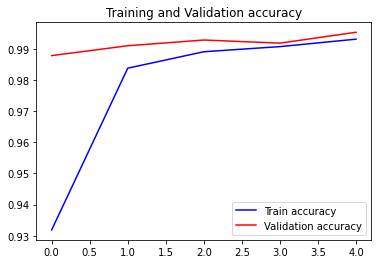

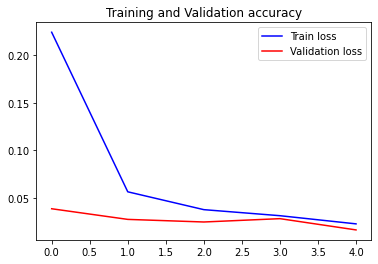

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(train_accuracy))

plt.plot(epochs, train_accuracy, 'b', label='Train accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b', label='Train loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation accuracy')
plt.legend()

plt.show()

# Now, lets test the model

test your model with the test data

In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/8.jpg              
  inflating: __MACOSX/test/._8.jpg   
  inflating: test/9.jpg              
  inflating: __MACOSX/test/._9.jpg   
  inflating: test/4.jpg              
  inflating: __MACOSX/test/._4.jpg   
  inflating: test/5.jpg              
  inflating: __MACOSX/test/._5.jpg   
  inflating: test/7.jpg              
  inflating: __MACOSX/test/._7.jpg   
  inflating: test/6.jpg              
  inflating: __MACOSX/test/._6.jpg   
  inflating: test/2.jpg              
  inflating: __MACOSX/test/._2.jpg   
  inflating: test/3.jpg              
  inflating: __MACOSX/test/._3.jpg   
  inflating: test/1.jpg              
  inflating: __MACOSX/test/._1.jpg   
  inflating: test/0.jpg              
  inflating: __MACOSX/test/._0.jpg   


In [ ]:
from glob import glob
import cv2
test_dir = glob('test/*.jpg')

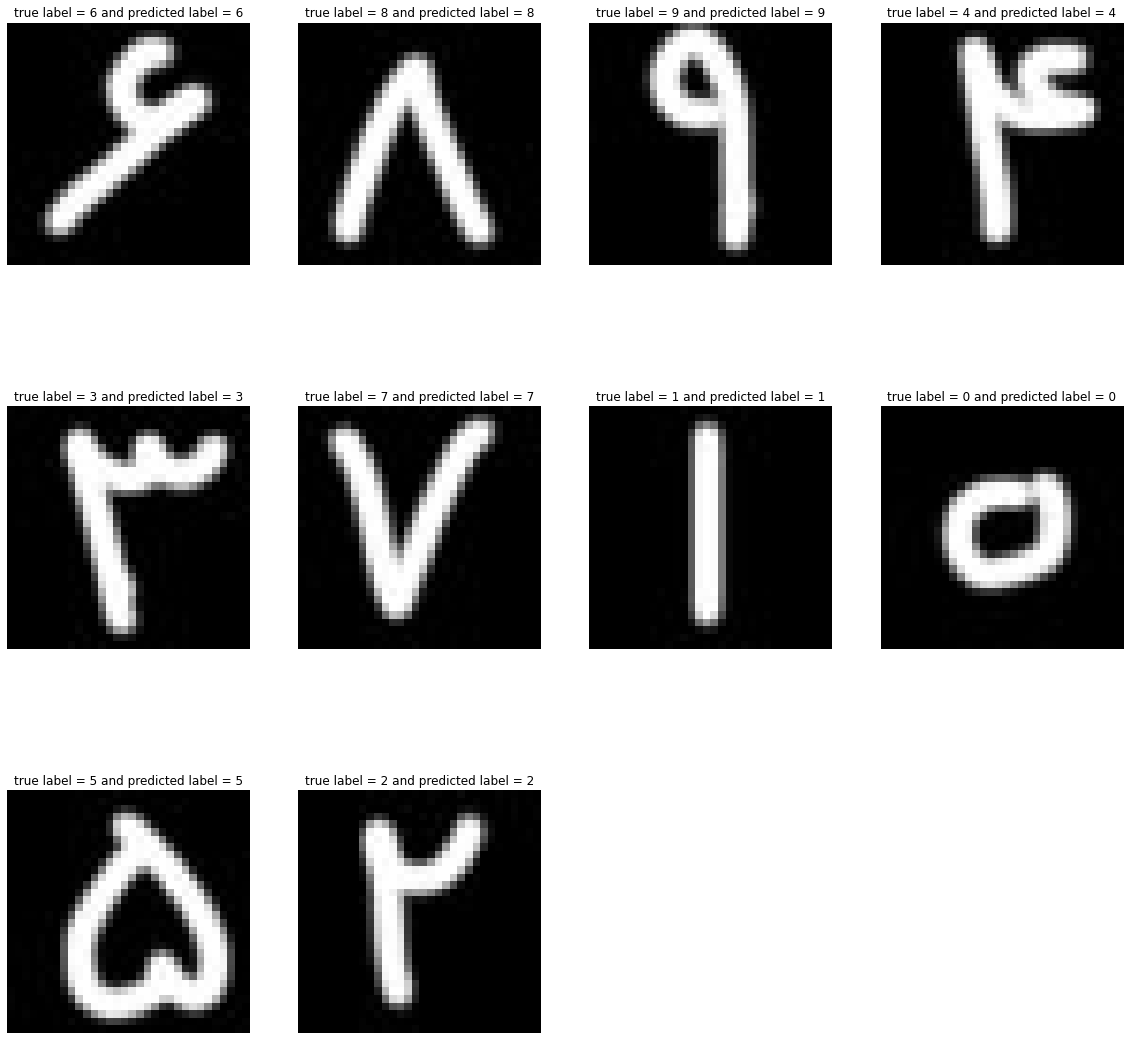

In [ ]:
figure = plt.figure(figsize=(20, 20))
for i in range(1,len(test_dir)+1):
    test_img = cv2.imread(test_dir[i-1], cv2.IMREAD_GRAYSCALE).astype('float32')
    test_img.shape = (1,32, 32, 1)
    test_lbl = test_dir[i-1].split('/')[1].split('.')[0].split('_')[0]
    prediction = model.predict(test_img, verbose=0)
    predicted_lbl = np.argmax(prediction)
    figure.add_subplot(3, 4, i)
    plt.title('true label = ' + str(test_lbl) 
          + ' and predicted label = ' + str(predicted_lbl))
    plt.axis("off")
    plt.imshow(test_img.reshape(32,32),  cmap="gray")
plt.show()